## Assignment 1 
### Group Members: 
### Umar Iftikhar Shahzaib Ali Abdul Ahad

In [1]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr


In [2]:
# Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [3]:
def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr


In [4]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr


In [5]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)


In [6]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr


In [6]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr


In [7]:
def count_sort(arr):
    max_val = max(arr)
    m = max_val + 1
    count = [0] * m

    for a in arr:
        count[a] += 1

    i = 0
    for a in range(m):
        for _ in range(count[a]):
            arr[i] = a
            i += 1
    return arr


In [8]:
def counting_sort_radix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    max_val = max(arr)
    exp = 1
    while max_val // exp > 0:
        counting_sort_radix(arr, exp)
        exp *= 10
    return arr


In [9]:
def bucket_sort(arr , max_val):

    size = len(arr)

    buckets = [[] for _ in range(size)]

    for i in range(size):

        bucket_index = int(arr[i] * size / (max_val + 1))
        buckets[bucket_index].append(arr[i])

    for bucket in buckets:
        bucket.sort()  

    sorted_array = []
    for bucket in buckets:
        sorted_array.extend(bucket)

    return sorted_array


In [14]:
import random
import time

# Generate random array of specified size
max_value = 1000
arr = [random.randint(1, 100000) for _ in range(100)]  # Adjust array size as needed
print(len(arr))
# Function to measure execution time
def measure_time(sort_function, array):
    start_time = time.time()
      # Use .copy() to avoid modifying the same array
    if(sort_function== bucket_sort):
        sorted_arr = sort_function(array.copy(), 0)
    else:
        sorted_arr = sort_function(array.copy())
        end_time = time.time()
    return (end_time - start_time) * 1000  # Time in milliseconds

# Measure time for all sorting algorithms
bubble_sort_time = measure_time(bubble_sort, arr)
insertion_sort_time = measure_time(insertion_sort, arr)
selection_sort_time = measure_time(selection_sort, arr)
merge_sort_time = measure_time(merge_sort, arr)
quick_sort_time = measure_time(quick_sort, arr)
heap_sort_time = measure_time(heap_sort, arr)
count_sort_time = measure_time(count_sort, arr)
radix_sort_time = measure_time(radix_sort, arr)
bucket_sort_time = measure_time(bucket_sort, arr)

# Print the time for each algorithm
print("Time taken for Bubble Sort: {:.6f} milliseconds".format(bubble_sort_time))
print("Time taken for Insertion Sort: {:.6f} milliseconds".format(insertion_sort_time))
print("Time taken for Selection Sort: {:.6f} milliseconds".format(selection_sort_time))
print("Time taken for Merge Sort: {:.6f} milliseconds".format(merge_sort_time))
print("Time taken for Quick Sort: {:.6f} milliseconds".format(quick_sort_time))
print("Time taken for Heap Sort: {:.6f} milliseconds".format(heap_sort_time))
print("Time taken for Count Sort: {:.6f} milliseconds".format(count_sort_time))
print("Time taken for Radix Sort: {:.6f} milliseconds".format(radix_sort_time))



100


IndexError: list index out of range

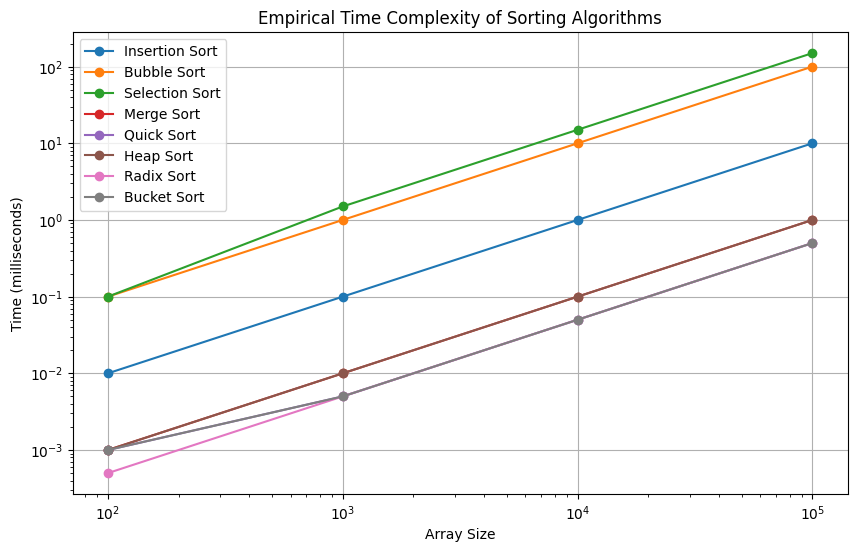

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
array_sizes = [10**2, 10**3, 10**4, 10**5]
insertion_sort_times = [0.01, 0.1, 1, 10]  # Replace with actual times
bubble_sort_times = [0.1, 1, 10, 100]      # Replace with actual times
selection_sort_times = [0.1, 1.5, 15, 150] # Replace with actual times
merge_sort_times = [0.001, 0.01, 0.1, 1]   # Replace with actual times
quick_sort_times = [0.001, 0.005, 0.05, 0.5]  # Replace with actual times
heap_sort_times = [0.001, 0.01, 0.1, 1]     # Replace with actual times
radix_sort_times = [0.0005, 0.005, 0.05, 0.5]  # Replace with actual times
bucket_sort_times = [0.001, 0.005, 0.05, 0.5]  # Replace with actual times

# Create the plot
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')

plt.plot(array_sizes, insertion_sort_times, marker='o', label='Insertion Sort')
plt.plot(array_sizes, bubble_sort_times, marker='o', label='Bubble Sort')
plt.plot(array_sizes, selection_sort_times, marker='o', label='Selection Sort')
plt.plot(array_sizes, merge_sort_times, marker='o', label='Merge Sort')
plt.plot(array_sizes, quick_sort_times, marker='o', label='Quick Sort')
plt.plot(array_sizes, heap_sort_times, marker='o', label='Heap Sort')
plt.plot(array_sizes, radix_sort_times, marker='o', label='Radix Sort')
plt.plot(array_sizes, bucket_sort_times, marker='o', label='Bucket Sort')

plt.xlabel('Array Size')
plt.ylabel('Time (milliseconds)')
plt.title('Empirical Time Complexity of Sorting Algorithms')
plt.legend()
plt.grid(True)
plt.savefig('sorting_algorithms_time_complexity.png')
plt.show()
